# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidance to answer the following questions.

1. Which hosts are the busiest and why?
2. How many neighborhood groups are available and which shows up the most?
3. Are private rooms the most popular in manhattan?
4. Which hosts are the busiest and based on their reviews?
5. Which neighorhood group has the highest average price?
6. Which neighborhood group has the highest total price?
7. Which top 5 hosts have the highest total price?
8. Who currently has no (zero) availability with a review count of 100 or more?
9. What host has the highest total of prices and where are they located?
10. When did Danielle from Queens last receive a review?

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this intire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to similate what you will face when you are out in the wild. 

Happy Coding!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
air_bnb = pd.read_csv('../Panda/AB_NYC_2019.csv')
air_bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [18]:
# How many neighborhood groups are available and which shows up the most?

# Counting the occurances of each neighbourhood group
neighbourhood_group_counts = air_bnb['neighbourhood_group'].value_counts()

# Display the number of neighbourhood groups and the one that shows up most
num_neighbourhood_groups = len(neighbourhood_group_counts)
most_common_neighbourhood_group = neighbourhood_group_counts.idxmax()

print(f"Number of neighbourhood groups: {num_neighbourhood_groups}")
print(f"The neighbourhood group that shows up the most is: {most_common_neighbourhood_group}")

Number of neighbourhood groups: 5
The neighbourhood group that shows up the most is: Manhattan


In [17]:
# Are private rooms the most popular in manhattan?

# Filtering the DataFrame for Manhattan
manhattan_data = air_bnb[air_bnb['neighbourhood_group'] == 'Manhattan']

# Counting the occurances of each room type in Manhattan
room_type_counts = manhattan_data['room_type'].value_counts()

# Displaying the distibution of room types in Manhattan
print("Distribution of room types in Manhattan:")
print(room_type_counts)

# Checking if private room types are the most popular
most_popular_room_type = room_type_counts.idxmax()

print(f"\nIs private room the most popular in Manhattan? {'Yes' if most_popular_room_type == 'Private room' else 'No'}")

Distribution of room types in Manhattan:
Entire home/apt    13199
Private room        7982
Shared room          480
Name: room_type, dtype: int64

Is private room the most popular in Manhattan? No


In [28]:
# Which hosts are the busiest based on their reviews?

# Identifying the hosts with the highest number of reviews
busiest_hosts = air_bnb.groupby('host_id')['number_of_reviews'].sum().sort_values(ascending=False)

print("Top 5 busiest hosts based on number of reviews:")
print(busiest_hosts.head())

Top 5 busiest hosts based on number of reviews:
host_id
37312959    2273
344035      2205
26432133    2017
35524316    1971
40176101    1818
Name: number_of_reviews, dtype: int64


In [32]:
# Which neighorhood group has the highest average price?

# Calculating the average price of each neighbourhood group
average_price_by_neighbourhood = air_bnb.groupby('neighbourhood_group')['price'].mean()

# Identifying the neighbourhood group with the highest average price
highest_avg_price_neighbourhood = average_price_by_neighbourhood.idxmax()
highest_avg_price_value = average_price_by_neighbourhood.max()

#Displaying results
print(f"The neighbourhood group with the highest average price is {highest_avg_price_neighbourhood} with an average price of ${highest_avg_price_value:.2f}")

The neighbourhood group with the highest average price is Manhattan with an average price of $196.88


In [33]:
# Which neighborhood group has the highest total price?

# Calculating the total price for each neighbourhood group
total_price_by_neighbourhood = air_bnb.groupby('neighbourhood_group')['price'].sum()

# Identifying the neighbourhood group with the highest total price
highest_total_price_neighbourhood = total_price_by_neighbourhood.idxmax()
highest_total_price_value = total_price_by_neighbourhood.max()

# Displaying the results
print(f"The neighbourhood group with the highest total price is {highest_total_price_neighbourhood} with a total price of ${highest_total_price_value:.2f}")

The neighbourhood group with the highest total price is Manhattan with a total price of $4264527.00


In [36]:
# Which top 5 hosts have the highest total price?

# Calculating the total price for each host
total_price_by_host = air_bnb.groupby('host_id')['price'].sum()

# Identifying the top 5 hosts with the highest total price
top5_hosts_highest_total_price = total_price_by_host.nlargest(5)

# Displaying the results
print("Top 5 hosts with the highest total price:")
print(top5_hosts_highest_total_price)

Top 5 hosts with the highest total price:
host_id
219517861    82795
107434423    70331
156158778    37097
205031545    35294
30283594     33581
Name: price, dtype: int64


In [39]:
# Who currently has no (zero) availability with a review count of 100 or more?

# Filtering the DataFrame based on availability and review count criteria
host_with_zero_availability = air_bnb.loc[(air_bnb['availability_365'] == 0) & (air_bnb['number_of_reviews'] >= 100), 'host_id'].unique()

# Displaying the results
print("Hosts with zero availability and review count of 100 or more:")
print(host_with_zero_availability)

Hosts with zero availability and review count of 100 or more:
[     7490     79402    129352    193722     67778    239208    303939
    522065    683975    242506    792159   1311398   1358312   1360043
     36897   1492339   1503831   1649300   1935605   1146958   2265770
   2275829   2361715   1787284   1215949   2494666   3558158   3778274
   3880974   3955766   4129805   1099716   4434798   5634395    663764
    585273   6482637   3571821   6774871   7581642   5464042   4983320
   8732694   1562642   8910286   9234456   9268156   3187531   1726966
  11947308   3793026  16266298  16106756  13337141  17820079   3912009
  17224426  18219988  18834080   9492212    610819  22171095  21641206
   6465286  21688465  17921968   3417940  22210080  25404246  10795846
   7463662  23719409  28723165  30314132  24561040  31040344  31150792
   1197823  25915648  33750239  23082955   5577926  36644635  39603420
  22959695  40371157  43509184  10024006  31104953  44924546  23073564
  37818581  487

In [41]:
# What host has the highest total of prices and where are they located?

# Calculating the total price for each host
total_price_by_host = air_bnb.groupby('host_id')['price'].sum()

# Identifying the host with the highest total price
host_highest_total_price = total_price_by_host.idxmax()
highest_total_price_value = total_price_by_host.max()

# Getting the location information for the host with the highest total price
location_info = air_bnb.loc[air_bnb['host_id'] == host_highest_total_price, ['host_name', 'neighbourhood_group', 'neighbourhood']]

# Displaying results
print(f"The host with the highest total price is host_id {host_highest_total_price} with a total price of ${highest_total_price_value:.2f}")
print("Location Information:")
print(location_info)

The host with the highest total price is host_id 219517861 with a total price of $82795.00
Location Information:
          host_name neighbourhood_group       neighbourhood
38293  Sonder (NYC)           Manhattan  Financial District
38294  Sonder (NYC)           Manhattan  Financial District
38588  Sonder (NYC)           Manhattan  Financial District
39769  Sonder (NYC)           Manhattan         Murray Hill
39770  Sonder (NYC)           Manhattan         Murray Hill
...             ...                 ...                 ...
47691  Sonder (NYC)           Manhattan  Financial District
47692  Sonder (NYC)           Manhattan  Financial District
47693  Sonder (NYC)           Manhattan  Financial District
47814  Sonder (NYC)           Manhattan  Financial District
47821  Sonder (NYC)           Manhattan  Financial District

[327 rows x 3 columns]


In [56]:
# When did Danielle from Queens last receive a review?

# Filter the DataFrame for Danielle from Queens
danielle_queens_reviews = air_bnb[(air_bnb['host_name'] == 'Danielle') & (air_bnb['neighbourhood_group'] == 'Queens')]

# Identify the most recent review date for Danielle from Queens
last_review_date = danielle_queens_reviews['last_review'].max()

# Display the result
print(f"Danielle from Queens last received a review on: {last_review_date}")

Danielle from Queens last received a review on: nan


## Further Questions

1. Which host has the most listings?

In [63]:
# Identifying the host with the most listings
host_most_listings = air_bnb.groupby('host_id')['calculated_host_listings_count'].max().idxmax()
num_listings = air_bnb.groupby('host_id')['calculated_host_listings_count'].max().max()

# Displaying the result
print(f"The host with the most listings is host_id {host_most_listings} with {num_listings} listings.")

The host with the most listings is host_id 219517861 with 327 listings.


2. How many listings have completely open availability?

In [64]:
# Counting the number of listings with completely open availability
open_avail_listings_count = len(air_bnb[air_bnb['availability_365'] == 365])

print(f"The number of listings with completely open availability is: {open_avail_listings_count}")

The number of listings with completely open availability is: 1295


3. What room_types have the highest review numbers?

In [66]:
# Calculating the total number of reviews for each room type
reviews_by_room_type = air_bnb.groupby('room_type')['number_of_reviews'].sum()

# Identifying the room types with the highest total number of reviews
room_types_highest_reviews = reviews_by_room_type.idxmax()
highest_reviews_value = reviews_by_room_type.max()

print(f"The room type(s) with the highest total number of reviews is/are {room_types_highest_reviews} with {highest_reviews_value} reviews.")

The room type(s) with the highest total number of reviews is/are Entire home/apt with 580403 reviews.


# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --

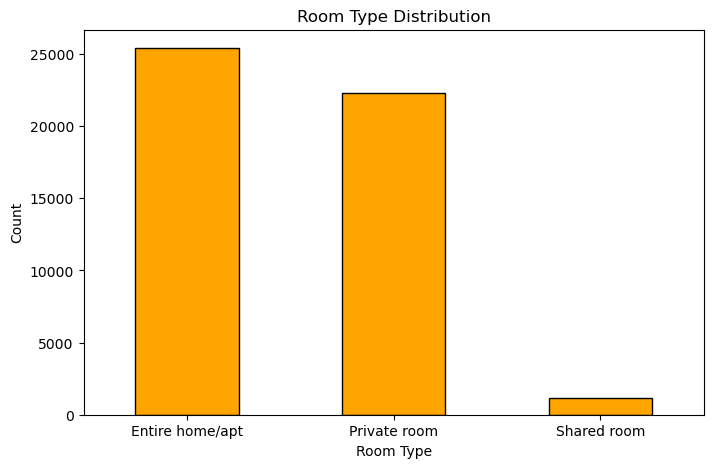

In [72]:
# Bar Chart of Room Types

room_type_counts = air_bnb['room_type'].value_counts()

plt.figure(figsize=(8, 5))
room_type_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

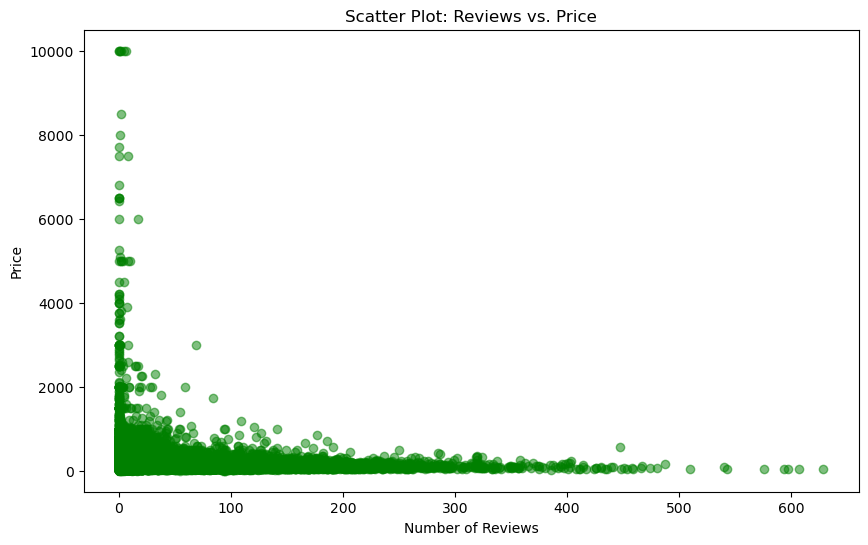

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(air_bnb['number_of_reviews'], air_bnb['price'], alpha=0.5, color='green')
plt.title('Scatter Plot: Reviews vs. Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()